# Analysis of the synthetic calibration of the equilirium MD1 runs

## 20% parameter variance 

In [2]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
ls 20_percent/csv-files

out-cfall-vegc-md1-r-EJ.finalresults.csv
out-cmax-gpp-md1-r-EJ.finalresults.csv
out-csoil-md1-r-EJ.finalresults.csv
out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv
out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv
param-cfall-vegc-md1-r-EJ.finalresults.csv
param-cmax-gpp-md1-r-EJ.finalresults.csv
param-csoil-md1-r-EJ.finalresults.csv
param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv
param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv


## (1) cmax -> GPP

In [6]:
path='20_percent/csv-files/'
#path='all-md1-setup-files-20per/'
model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model.head()

,GPP0,GPP1,GPP2,GPP3
0,306.987830,24.170209,64.424002,47.733915
1,307.170002,24.609999,50.009993,52.870001
2,410.892065,41.361934,47.995694,10.762071
3,307.170141,24.610003,50.009986,52.869999
4,307.169911,24.610095,50.010144,52.870034


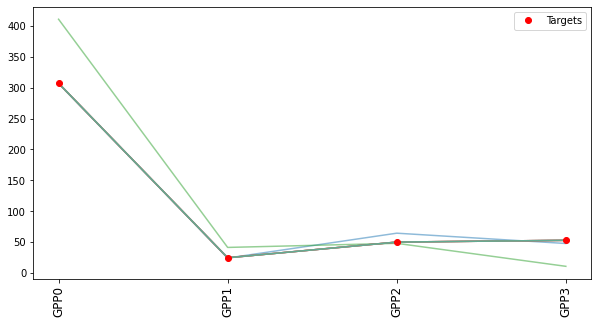

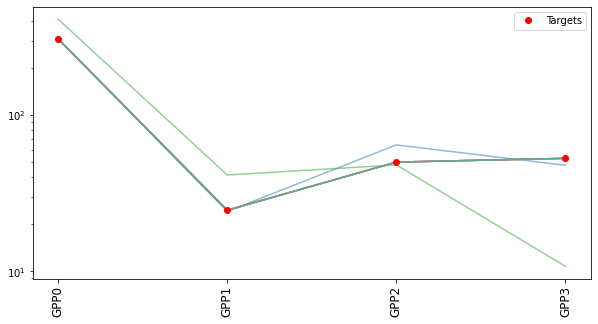

In [7]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

array([1.20556074e-04, 8.65128391e+00, 8.34500621e-07, 3.47979916e-04,
       3.95339414e-05, 2.77796705e-04, 5.03513232e+01, 7.61107392e+02,
       7.56080469e-05, 7.32301422e-05])

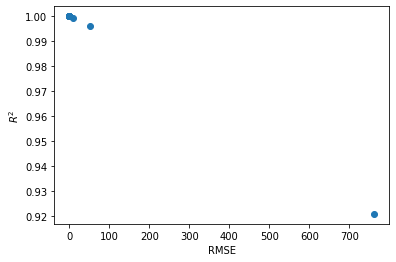

In [4]:
ut.plot_r2_rmse(df_model)

In [5]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730


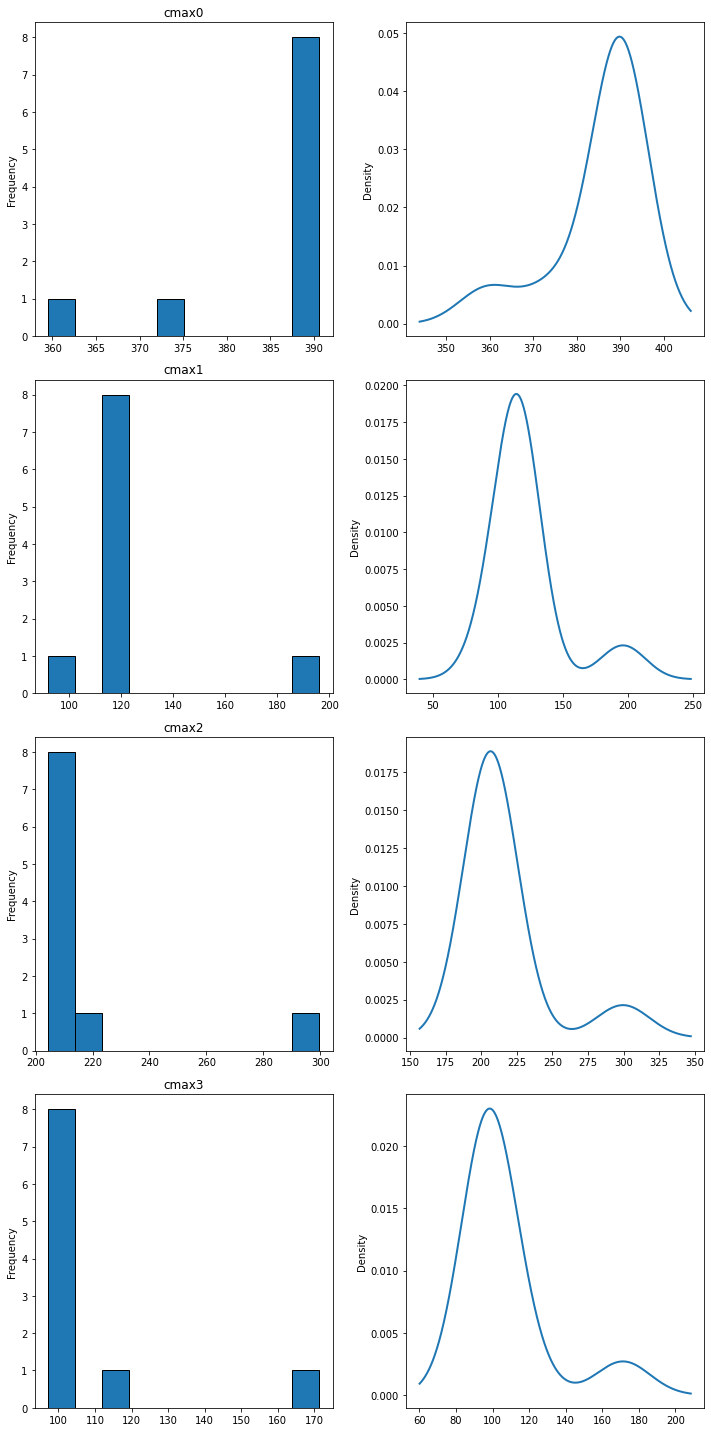

In [6]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [7]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-3.083048608303045 6.956290645459774
1.378170785382391 6.13264234593232
2.6766344451904303 7.553725706752838
5.112857370376588 13.105634910314583


,0
GPP0,-0.443203
GPP1,0.224727
GPP2,0.354346
GPP3,0.390127


In [8]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-0.0011082601546945625 0.0013054243748860065
0.007552335560319534 0.010084213572456145
-0.005444728136055232 0.006379024385854278
0.0004249191284273479 0.007453905997512513


,0
GPP0,-0.848965
GPP1,0.748927
GPP2,-0.853536
GPP3,0.057006


In [9]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [10]:
df_model.iloc[-1]

GPP0    313.69
GPP1     24.76
GPP2     48.55
GPP3     55.07
Name: 10, dtype: float64

In [11]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,313.688303,24.759414,48.549932,55.070333,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,313.687196,24.755589,48.540452,55.063704,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,313.690325,24.768076,48.535881,55.075314,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,313.688549,24.775684,48.550938,55.062689,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,313.690085,24.778998,48.545574,55.080085,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,313.692423,24.784893,48.571340,55.064499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,313.652929,24.762385,48.552882,55.071918,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,313.790861,19.704034,51.555334,55.058247,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,303.412512,25.322847,48.312276,64.837560,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,293.076330,42.969787,72.551736,96.444225,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


In [12]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,389.540351,114.887855,205.447291,97.197723,1.000000,8.345006e-07,0.000009,1.000000,1.098075e-09,0.000029
4,390.606140,115.198657,205.954026,97.526114,1.000000,3.953394e-05,0.000125,0.999816,5.202061e-08,0.000397
9,389.565302,114.929591,205.401516,97.206311,1.000000,7.323014e-05,0.000179,0.999730,9.635966e-08,0.000570
8,389.548492,114.960704,205.453587,97.184264,1.000000,7.560805e-05,0.000197,0.999700,9.948863e-08,0.000630
0,390.408856,115.246207,205.873774,97.488087,1.000000,1.205561e-04,0.000260,0.999599,1.586334e-07,0.000830
5,390.610529,115.328778,206.074923,97.527499,1.000000,2.777967e-04,0.000388,0.999396,3.655380e-07,0.001237
3,389.522924,114.904295,205.467353,97.200265,1.000000,3.479799e-04,0.000077,0.999891,4.578887e-07,0.000246
1,389.672232,91.911084,216.885615,97.170591,0.999383,8.651284e+00,0.078856,0.867937,1.138342e-02,0.251804
6,374.564041,117.523115,204.415973,114.457343,0.996006,5.035132e+01,0.052917,0.878539,6.627582e-02,0.181347
7,359.514558,196.113527,299.626454,171.332920,0.921003,7.611074e+02,0.313484,-0.078997,1.003115e+00,1.416418


## (2) nmax -> NPP

In [13]:
model='out-nmax-npp-md1-r-EJ.finalresults.csv'
params='param-nmax-npp-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['NPP0','NPP1','NPP2','NPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3
0,113.150164,11.300259,22.884175,32.414791
1,113.157992,11.300747,22.901814,32.414768
2,113.151281,11.300390,22.875255,32.414791
3,113.155251,11.300583,22.875568,32.414746
4,113.203987,11.303723,22.898160,32.415546


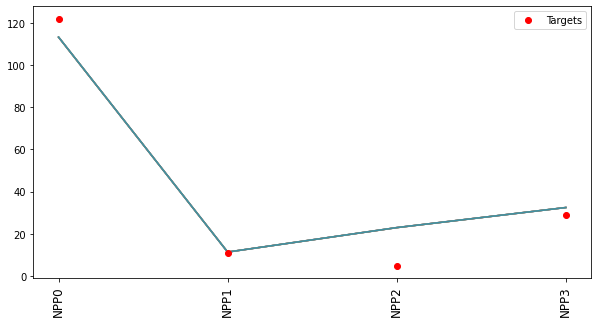

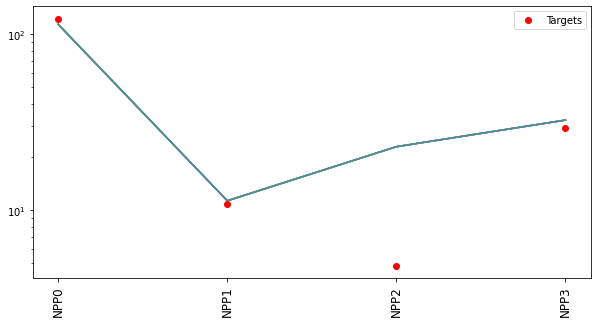

In [14]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

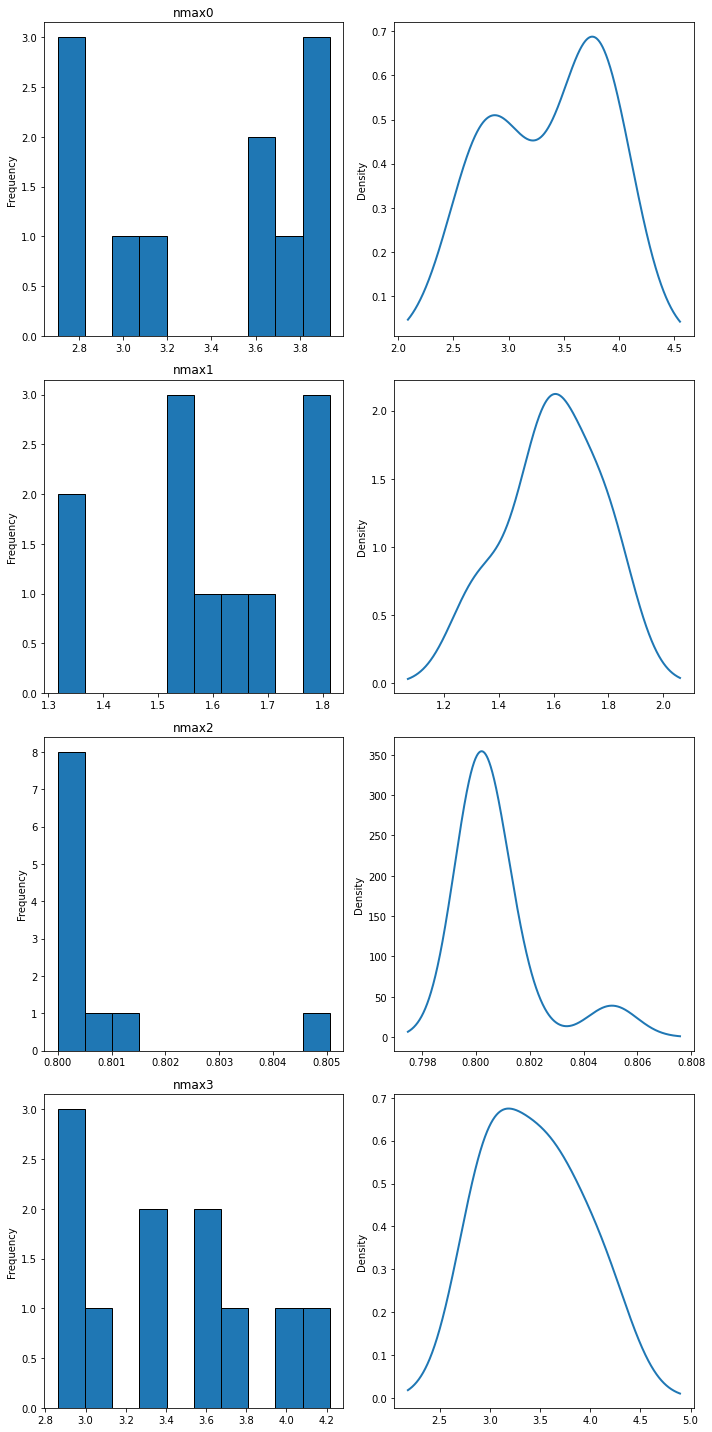

In [15]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [16]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_true_params = [3.38, 1.55, 1.00, 3.55]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
8,3.134156,1.317059,0.800036,3.350877,0.935613,103.566198,0.253667,0.875292,0.999477,1.413702
4,3.827536,1.771406,0.800008,3.668393,0.935591,103.603238,0.253668,0.796937,0.999834,1.413958
3,2.737330,1.585337,0.800000,2.958452,0.935532,103.611201,0.253660,0.852154,0.999915,1.413992
7,3.779839,1.812788,0.800453,4.062985,0.935580,103.619735,0.253672,0.731009,0.999994,1.414082
5,3.652873,1.672241,0.800096,3.779739,0.935571,103.626102,0.253682,0.635035,1.000055,1.414153
2,2.704950,1.534408,0.800003,3.081555,0.935517,103.625890,0.253665,0.781967,1.000057,1.414107
6,3.936150,1.335857,0.800079,4.216623,0.935572,103.630562,0.253675,0.684480,1.000098,1.414165
10,3.677151,1.555165,0.800756,2.861444,0.935548,103.661123,0.253691,0.493530,1.000394,1.414417
9,3.835585,1.795082,0.801422,2.907793,0.935549,103.666511,0.253684,0.538961,1.000445,1.414435
0,3.016305,1.564163,0.800019,3.574502,0.935459,103.711238,0.253686,0.446216,1.000881,1.414747


In [17]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0    121.96
NPP1     10.80
NPP2      4.84
NPP3     29.04
Name: 11, dtype: float64


,NPP0,NPP1,NPP2,NPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
8,113.202004,11.303947,22.893056,32.415721,0.935613,103.566198,0.253667,0.875292,0.999477,1.413702
4,113.203987,11.303723,22.898160,32.415546,0.935591,103.603238,0.253668,0.796937,0.999834,1.413958
3,113.155251,11.300583,22.875568,32.414746,0.935532,103.611201,0.253660,0.852154,0.999915,1.413992
7,113.204381,11.303740,22.900177,32.415547,0.935580,103.619735,0.253672,0.731009,0.999994,1.414082
5,113.200356,11.303846,22.898905,32.415667,0.935571,103.626102,0.253682,0.635035,1.000055,1.414153
2,113.151281,11.300390,22.875255,32.414791,0.935517,103.625890,0.253665,0.781967,1.000057,1.414107
6,113.203588,11.303708,22.900994,32.415542,0.935572,103.630562,0.253675,0.684480,1.000098,1.414165
10,113.200635,11.303858,22.902918,32.415667,0.935548,103.661123,0.253691,0.493530,1.000394,1.414417
9,113.204660,11.303767,22.905491,32.415546,0.935549,103.666511,0.253684,0.538961,1.000445,1.414435
0,113.150164,11.300259,22.884175,32.414791,0.935459,103.711238,0.253686,0.446216,1.000881,1.414747


## (3) nmax, krb -> NPP, VEGC

In [18]:
model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,126.371477,9.563146,17.564974,28.983174,576.759540,2136.016699,521.581738,8.359118,72.370496,17.869718,5.934474,341.713547,6.350367,122.319941
1,125.580390,12.793429,15.326373,33.632723,573.158899,2190.685522,491.687897,8.514133,125.270040,28.900563,5.900829,285.037122,4.307429,141.464497
2,120.712354,12.393728,15.149317,27.358802,572.466852,2110.741626,493.759131,8.603640,119.603032,26.488630,6.088407,313.743954,4.665521,116.363651
3,126.523045,10.230776,16.008694,27.719906,574.733386,2223.613403,507.382498,8.520005,82.022469,24.489495,6.038845,329.093185,4.553992,117.441246
4,127.154478,13.449489,15.061625,29.018720,574.669812,2172.460229,509.615799,8.542675,132.016090,39.441954,5.753319,290.693567,5.192672,122.468439


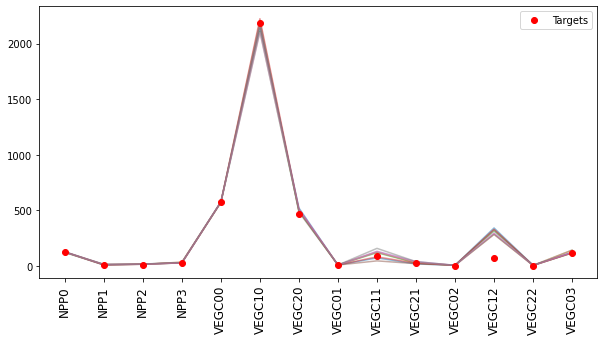

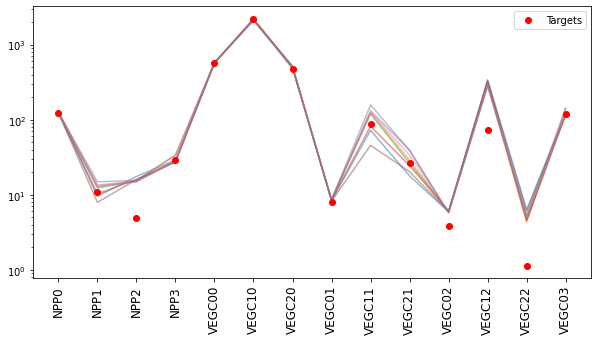

In [19]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

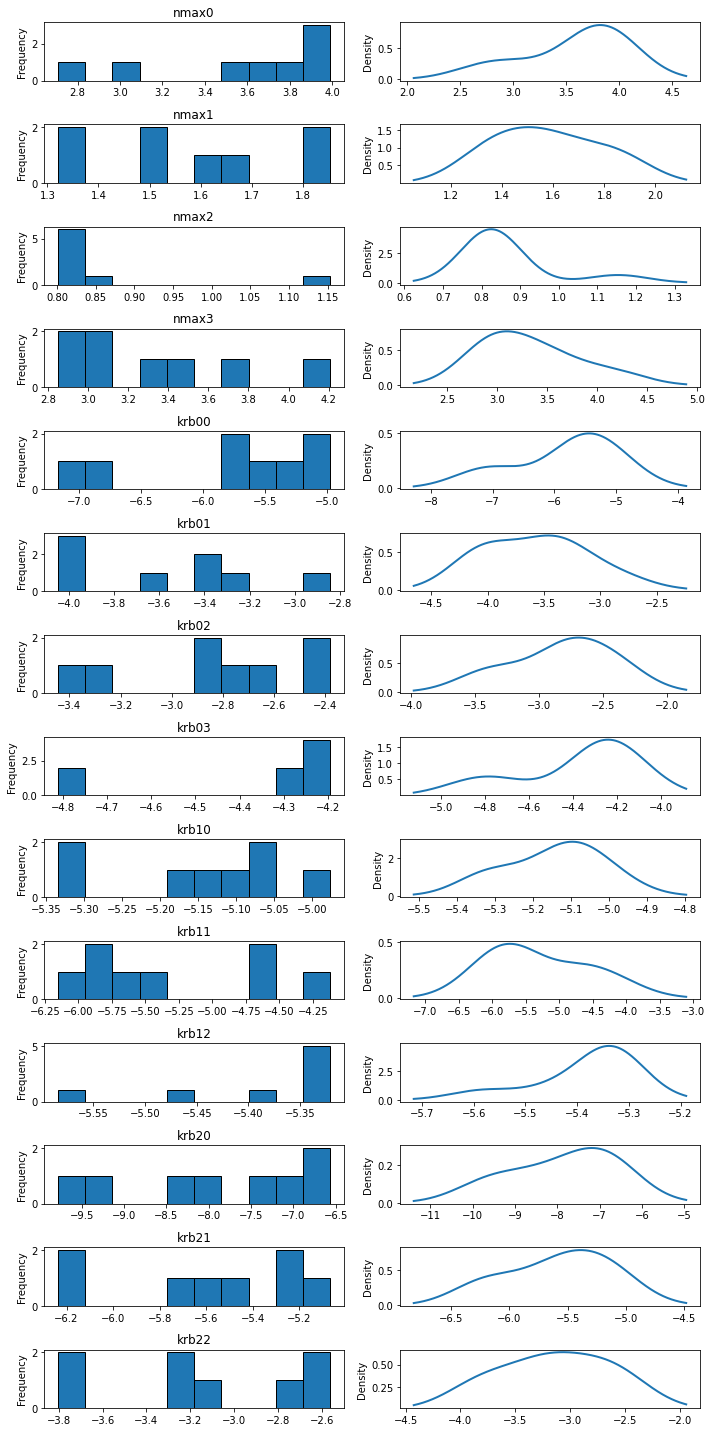

In [20]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [21]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,3.551812,1.354769,0.815223,3.755969,-4.971417,-4.050837,-2.759360,-4.772817,-5.334609,-5.528409,-5.322051,-7.942738,-5.254945,-2.561598,0.989090,3380.062024,0.250666,0.801823,0.609458,1.012103
7,3.703296,1.480741,0.836769,3.066864,-5.186512,-4.046846,-2.409943,-4.812417,-5.298841,-6.152975,-5.333129,-6.779462,-5.563492,-3.185545,0.988449,3580.002486,0.289446,0.551396,0.645509,1.134568
4,3.786842,1.853652,0.830619,3.435278,-5.305720,-3.280145,-2.381368,-4.274568,-5.181474,-5.905668,-5.323027,-9.783499,-6.156642,-3.277522,0.988010,3662.547723,0.260144,0.685790,0.660396,1.067399
6,2.706833,1.612895,0.800797,2.847404,-5.663833,-3.349718,-2.630232,-4.245349,-5.057988,-5.795484,-5.320830,-9.284643,-5.719464,-3.158490,0.984988,4301.757721,0.248912,0.594249,0.775670,1.116007
2,3.991117,1.850022,0.831532,3.386699,-5.742387,-3.591156,-3.445040,-4.194171,-5.084917,-5.594518,-5.378947,-7.221495,-5.189634,-2.784714,0.983859,4676.403420,0.231453,0.598354,0.843220,1.125913
5,3.932429,1.654976,0.833437,2.884931,-5.629504,-2.841803,-2.866677,-4.211386,-5.143291,-4.120000,-5.455620,-7.027277,-6.237536,-3.803881,0.984414,4771.069330,0.310219,0.163438,0.860274,1.319117
3,3.015140,1.496104,1.153328,3.027785,-7.175177,-4.023429,-3.293377,-4.234629,-5.081656,-4.693874,-5.338322,-6.564173,-5.496971,-2.562190,0.984903,4855.087193,0.215006,0.644540,0.875409,1.116556
0,3.945297,1.320486,0.824491,4.208602,-6.942092,-3.426307,-2.810809,-4.272425,-4.975873,-4.659518,-5.584455,-8.362838,-5.066323,-3.772460,0.981439,5546.901519,0.264426,0.221914,1.000172,1.314118


In [22]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 8, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,125.580390,12.793429,15.326373,33.632723,573.158899,2190.685522,491.687897,8.514133,125.270040,28.900563,5.900829,285.037122,4.307429,141.464497,0.989090,3380.062024,0.250666,0.801823,0.609458,1.012103
7,126.329923,14.898866,15.534038,34.054631,575.245398,2196.246802,483.095395,8.608280,158.164743,38.817181,5.773555,283.024622,5.133843,143.178674,0.988449,3580.002486,0.289446,0.551396,0.645509,1.134568
4,127.154478,13.449489,15.061625,29.018720,574.669812,2172.460229,509.615799,8.542675,132.016090,39.441954,5.753319,290.693567,5.192672,122.468439,0.988010,3662.547723,0.260144,0.685790,0.660396,1.067399
6,122.974161,12.972721,14.859367,28.441388,574.556946,2099.447192,505.609177,8.587996,126.434860,33.778658,5.865574,295.680685,5.067954,120.522717,0.984988,4301.757721,0.248912,0.594249,0.775670,1.116007
2,120.712354,12.393728,15.149317,27.358802,572.466852,2110.741626,493.759131,8.603640,119.603032,26.488630,6.088407,313.743954,4.665521,116.363651,0.983859,4676.403420,0.231453,0.598354,0.843220,1.125913
5,123.744772,7.931872,15.932692,27.734286,573.579565,2163.048999,496.756696,8.227026,45.621423,20.291812,5.949596,325.862552,5.970871,117.850917,0.984414,4771.069330,0.310219,0.163438,0.860274,1.319117
3,126.523045,10.230776,16.008694,27.719906,574.733386,2223.613403,507.382498,8.520005,82.022469,24.489495,6.038845,329.093185,4.553992,117.441246,0.984903,4855.087193,0.215006,0.644540,0.875409,1.116556
0,126.371477,9.563146,17.564974,28.983174,576.759540,2136.016699,521.581738,8.359118,72.370496,17.869718,5.934474,341.713547,6.350367,122.319941,0.981439,5546.901519,0.264426,0.221914,1.000172,1.314118


## (3.1) SA nmax, krb -> NPP, VEGC

In [38]:
ls all-md1-setup-files-20per/sa-nmax-krb-npp-vegc-md1-r 

info.txt           param_props.csv    results.csv        sample_matrix.csv


In [49]:
sa_path='all-md1-setup-files-20per/sa-nmax-krb-npp-vegc-md1-r/'
model='results.csv'
params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
print(df_param.head())
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header

df_model.head()
df_param.head()

       nmax    nmax.1    nmax.2    nmax.3    krb(0)  krb(0).1  krb(0).2  \
0  3.583675  1.744387  0.831113  3.622578 -5.971253 -3.998588 -3.230974   
1  2.850378  1.422986  0.890833  3.259006 -6.598131 -3.972938 -2.534517   
2  3.084227  1.273082  1.072201  3.255786 -6.885972 -3.461627 -2.748595   
3  3.285784  1.832524  0.869426  3.719085 -4.879281 -3.786314 -2.360589   
4  3.350824  1.577219  1.093981  3.420535 -6.040981 -3.366317 -3.520019   

   krb(0).3    krb(1)  krb(1).1  krb(1).2    krb(2)  krb(2).1  krb(2).2  
0 -4.176166 -3.966004 -5.789116 -6.261680 -6.633858 -5.595319 -3.468742  
1 -5.404319 -5.749063 -4.864284 -6.924850 -9.242339 -5.381671 -3.011102  
2 -4.830296 -5.585412 -4.349367 -5.335500 -7.125130 -5.077723 -3.449680  
3 -3.791876 -4.435826 -4.607497 -6.215647 -9.278907 -6.191378 -3.649910  
4 -3.885684 -4.231634 -4.379348 -7.375191 -8.649903 -5.797633 -3.572199  


,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22
0,3.583675,1.744387,0.831113,3.622578,-5.971253,-3.998588,-3.230974,-4.176166,-3.966004,-5.789116,-6.261680,-6.633858,-5.595319,-3.468742
1,2.850378,1.422986,0.890833,3.259006,-6.598131,-3.972938,-2.534517,-5.404319,-5.749063,-4.864284,-6.924850,-9.242339,-5.381671,-3.011102
2,3.084227,1.273082,1.072201,3.255786,-6.885972,-3.461627,-2.748595,-4.830296,-5.585412,-4.349367,-5.335500,-7.125130,-5.077723,-3.449680
3,3.285784,1.832524,0.869426,3.719085,-4.879281,-3.786314,-2.360589,-3.791876,-4.435826,-4.607497,-6.215647,-9.278907,-6.191378,-3.649910
4,3.350824,1.577219,1.093981,3.420535,-6.040981,-3.366317,-3.520019,-3.885684,-4.231634,-4.379348,-7.375191,-8.649903,-5.797633,-3.572199


This is strange we are not touching the `VEGC12`, need to chack the values.

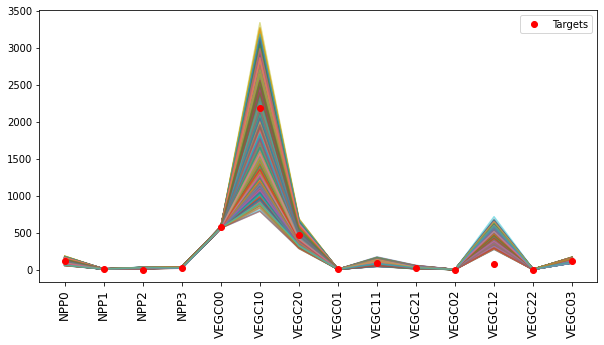

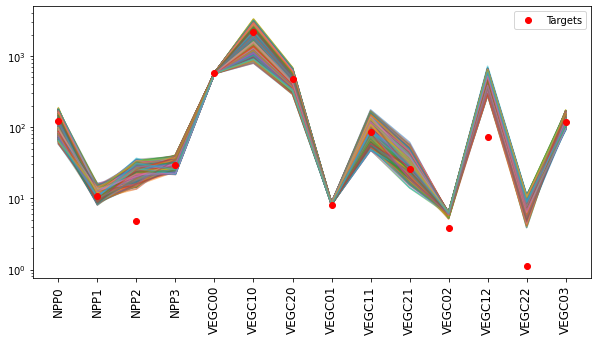

In [50]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [53]:
ls all-md1-setup-files-20per/

config-all-md1.yaml
config-cfall-npp-vegc-md1.yaml
config-cfall-vegc-md1-ej.yaml
config-cmax-gpp-md1.yaml
config-csoil-md1.yaml
config-krb-npp-md1.yaml
config-nfall-vegn-md1.yaml
config-nmax-npp-md1.yaml
out-cfall-vegc-md1-r-EJ.finalresults.csv
out-cfall-vegc-md1-r.finalresults.csv
out-cmax-gpp-md1-r-EJ.finalresults.csv
out-csoil-md1-r-EJ.finalresults.csv
out-csoil-md1-r.finalresults.csv
out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv
out-nfall-npp-vegc-vegn-md1-r.finalresults.csv
out-nfall-vegn-md1-r-EJ.finalresults.csv
out-nfall-vegn-md1-r.finalresults.csv
out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv
out-nmax-krb-npp-vegc-md1-r.finalresults.csv
out-nmax-npp-md1-r-EJ.finalresults.csv
out-nmax-npp-md1-r.finalresults.csv
param-cfall-vegc-md1-r-EJ.finalresults.csv
param-cfall-vegc-md1-r.finalresults.csv
param-cmax-gpp-md1-r-EJ.finalresults.csv
param-csoil-md1-r-EJ.finalresults.csv
param-csoil-md1-r.finalresults.csv
param-nfall-npp-vegc-vegn-md1-r.finalresults.csv
param-nfall-vegn-md

## (4) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [23]:
model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,102.259958,11.985806,23.592392,33.245597,571.829205,2054.950940,435.581464,7.959580,88.572072,29.940660,5.939912,409.239594,7.551089,128.841411
1,99.594647,12.218951,22.899020,34.057497,572.782892,2079.693848,453.798157,8.100175,84.510884,28.648086,5.937924,413.582184,6.609915,120.896177
2,101.650939,11.163938,23.954819,34.127104,575.429834,2062.055542,455.504056,8.506852,100.957644,33.338014,6.236520,410.491437,8.509895,120.869567
3,102.733409,11.063628,25.070401,32.944906,575.990210,2069.141382,465.147040,8.781829,103.014106,32.518117,6.211402,423.404477,8.892334,131.685808
4,100.521898,12.036281,25.114868,34.141682,575.661920,2074.714307,467.680228,8.020004,86.922916,32.501416,5.913951,420.257639,6.521413,120.404013


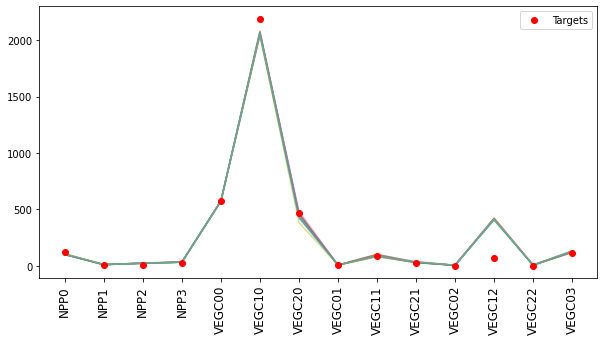

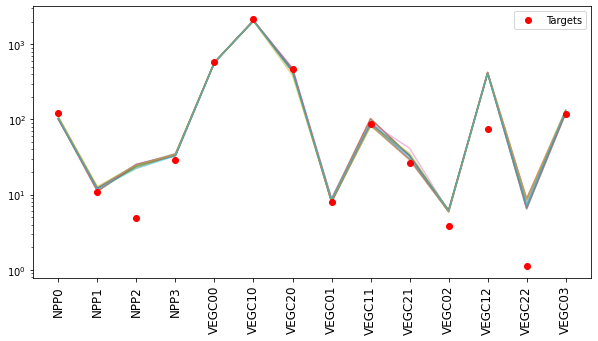

In [24]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [25]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
0.0011, 0.0507, 0.0250, 0.0199, 0.0034, 0.0058, 0.0036, 0.0052, 0.0012, 0.0260]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cfall00,cfall01,cfall02,cfall03,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,0.000880,0.060743,0.028432,0.023867,0.002798,0.005778,0.004319,0.005111,0.001440,0.027588,0.967477,9185.196700,0.251380,0.967477,0.880374,1.235290
9,0.000887,0.044032,0.021730,0.020846,0.002895,0.006259,0.004319,0.005456,0.001434,0.024738,0.966518,9283.971508,0.271264,0.670385,0.889864,1.290826
2,0.001158,0.048138,0.020508,0.023703,0.002723,0.004702,0.004221,0.004949,0.001175,0.021033,0.966301,9342.760478,0.270356,0.658480,0.895499,1.292457
7,0.001122,0.060793,0.027084,0.023353,0.002725,0.005969,0.004320,0.004858,0.001387,0.031172,0.966500,9368.411178,0.255802,0.836407,0.897947,1.258508
0,0.001168,0.059655,0.027399,0.021705,0.002823,0.005371,0.004295,0.005290,0.001327,0.023363,0.965561,9475.366553,0.260150,0.736721,0.908219,1.276343
4,0.000882,0.058482,0.029661,0.023813,0.002752,0.005547,0.004255,0.004883,0.001206,0.030439,0.965982,9574.752333,0.254799,0.766643,0.917716,1.270297
3,0.001198,0.043002,0.021611,0.020993,0.002723,0.004831,0.004230,0.004867,0.001283,0.021206,0.964719,9852.110324,0.273732,0.410400,0.944310,1.334946
6,0.001202,0.040568,0.028572,0.022526,0.002748,0.006230,0.004295,0.004656,0.001016,0.022316,0.963913,9956.786266,0.280047,0.286349,0.954360,1.357466
8,0.001272,0.054157,0.029918,0.021627,0.002885,0.006897,0.004313,0.006125,0.001222,0.021090,0.962236,10322.963495,0.290098,0.009021,0.989471,1.406788
5,0.001008,0.059891,0.024839,0.023411,0.002965,0.005324,0.004300,0.005590,0.001127,0.029616,0.961472,10440.415783,0.268623,0.238794,1.000742,1.363419


In [26]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       121.96
NPP1        10.80
NPP2         4.84
NPP3        29.04
VEGC00     579.41
VEGC10    2188.64
VEGC20     470.81
VEGC01       8.07
VEGC11      86.53
VEGC21      26.13
VEGC02       3.83
VEGC12      73.75
VEGC22       1.13
VEGC03     118.48
Name: 10, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,99.594647,12.218951,22.899020,34.057497,572.782892,2079.693848,453.798157,8.100175,84.510884,28.648086,5.937924,413.582184,6.609915,120.896177,0.967477,9185.196700,0.251380,0.967477,0.880374,1.235290
9,102.432001,11.850358,22.334117,32.797152,572.813348,2064.325122,432.196719,8.661872,90.539312,32.617214,6.164519,408.375522,7.097297,132.988527,0.966518,9283.971508,0.271264,0.670385,0.889864,1.290826
2,101.650939,11.163938,23.954819,34.127104,575.429834,2062.055542,455.504056,8.506852,100.957644,33.338014,6.236520,410.491437,8.509895,120.869567,0.966301,9342.760478,0.270356,0.658480,0.895499,1.292457
7,101.124369,12.364594,25.057279,33.964557,575.100708,2067.806909,465.357578,7.914812,82.750988,29.554984,6.004516,413.701678,6.433296,122.117027,0.966500,9368.411178,0.255802,0.836407,0.897947,1.258508
0,102.259958,11.985806,23.592392,33.245597,571.829205,2054.950940,435.581464,7.959580,88.572072,29.940660,5.939912,409.239594,7.551089,128.841411,0.965561,9475.366553,0.260150,0.736721,0.908219,1.276343
4,100.521898,12.036281,25.114868,34.141682,575.661920,2074.714307,467.680228,8.020004,86.922916,32.501416,5.913951,420.257639,6.521413,120.404013,0.965982,9574.752333,0.254799,0.766643,0.917716,1.270297
3,102.733409,11.063628,25.070401,32.944906,575.990210,2069.141382,465.147040,8.781829,103.014106,32.518117,6.211402,423.404477,8.892334,131.685808,0.964719,9852.110324,0.273732,0.410400,0.944310,1.334946
6,102.838611,11.658417,25.588681,33.635469,576.258893,2053.607202,485.673734,8.893580,90.570090,41.480253,5.959941,419.803256,8.572201,125.327673,0.963913,9956.786266,0.280047,0.286349,0.954360,1.357466
8,108.085187,12.770794,24.756590,34.328219,574.150684,2052.319873,383.771555,8.325493,80.815766,35.564850,5.891396,416.272855,8.659529,132.948828,0.962236,10322.963495,0.290098,0.009021,0.989471,1.406788
5,108.193313,12.247159,24.918865,35.121955,574.996063,2039.191138,425.762027,8.150058,89.397984,33.641962,6.067333,421.596115,6.780119,125.675711,0.961472,10440.415783,0.268623,0.238794,1.000742,1.363419


## (5.1) nfall -> NPP, VEGC, VEGN 

In [60]:
model='out-nfall-npp-vegc-vegn-md1-r.finalresults.csv'
params='param-nfall-npp-vegc-vegn-md1-r.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,115.897735,11.509624,22.907540,33.376376,574.194965,1918.018713,481.078336,8.386743,100.411484,33.304244,...,14.828806,30.543199,9.639920,0.387080,2.635182,0.717682,0.570989,12.103141,0.151649,1.179457
1,114.108579,11.377717,22.518427,32.981278,572.651080,1920.376721,481.558582,8.409052,100.371912,33.351910,...,14.799606,30.588892,9.649648,0.387981,2.636039,0.718436,0.573060,12.436695,0.152818,1.174565
2,115.846054,11.510637,23.213595,33.372941,574.462543,1915.813611,480.527335,8.411352,100.173495,33.273361,...,14.834930,30.511576,9.628912,0.388214,2.629142,0.717331,0.572423,12.281968,0.153685,1.179453
3,115.992976,11.512600,23.190162,33.373856,574.385742,1917.081873,480.863907,8.403715,100.314715,33.314615,...,14.833108,30.528685,9.635613,0.387822,2.632619,0.718212,0.572368,12.238873,0.153554,1.179596
4,116.131341,11.498792,23.275777,33.354268,574.224872,1921.791809,481.943158,8.374108,100.663534,33.376821,...,14.829203,30.605608,9.657294,0.386411,2.642417,0.718852,0.573064,12.375718,0.154256,1.179145


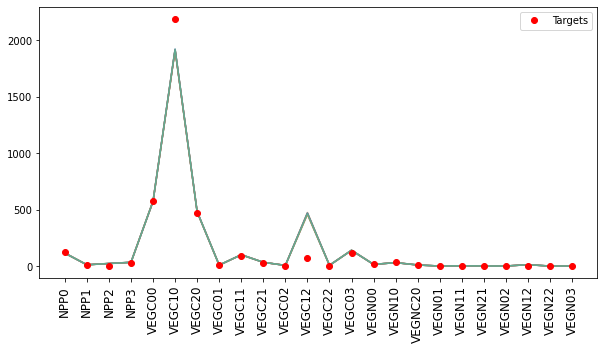

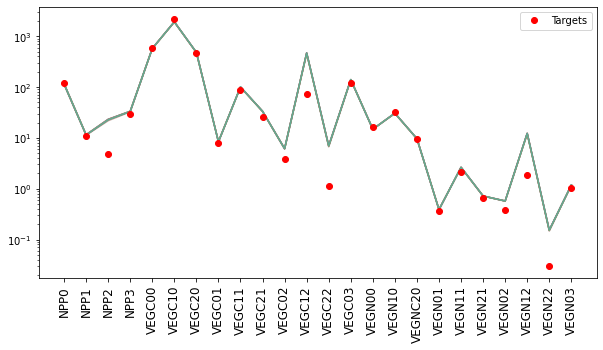

In [61]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

## (5) nfall -> VEGN

In [58]:
model='out-nfall-vegn-md1-r-EJ.finalresults.csv'
params='param-nfall-vegn-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  [
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,14.834394,30.493270,9.623787,0.389064,2.626314,0.716904,0.571436,12.104364,0.152241,1.179453
1,14.831417,30.465910,9.613609,0.389635,2.621536,0.717697,0.570675,12.108240,0.151766,1.179110
2,14.765998,30.393634,9.560406,0.385689,2.610199,0.716849,0.571380,12.158801,0.144602,1.152576
3,14.833336,30.487203,9.621113,0.389494,2.625672,0.717266,0.571419,12.245163,0.153778,1.179360
4,14.834334,30.507680,9.629190,0.387801,2.629707,0.717799,0.571469,12.136537,0.152845,1.179558


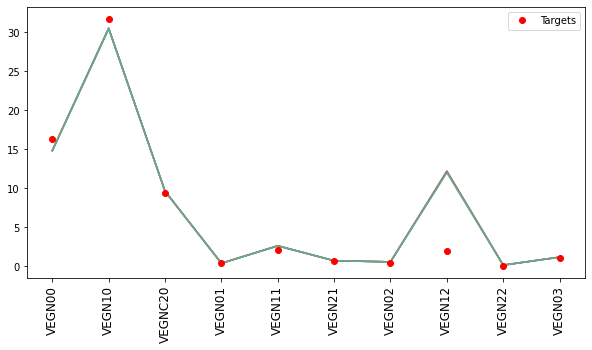

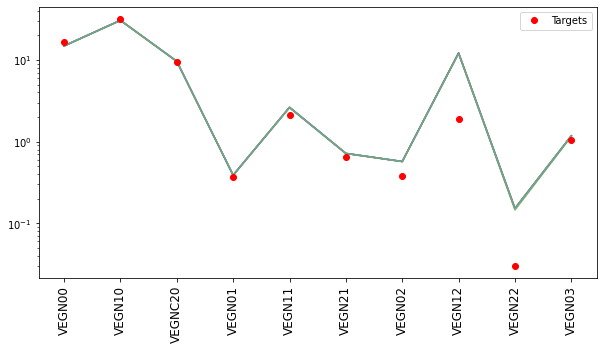

In [28]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [27]:
model='out-nfall-vegn-md1-r-EJ.finalresults.csv'
params='param-nfall-vegn-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  [
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,14.834394,30.493270,9.623787,0.389064,2.626314,0.716904,0.571436,12.104364,0.152241,1.179453
1,14.831417,30.465910,9.613609,0.389635,2.621536,0.717697,0.570675,12.108240,0.151766,1.179110
2,14.765998,30.393634,9.560406,0.385689,2.610199,0.716849,0.571380,12.158801,0.144602,1.152576
3,14.833336,30.487203,9.621113,0.389494,2.625672,0.717266,0.571419,12.245163,0.153778,1.179360
4,14.834334,30.507680,9.629190,0.387801,2.629707,0.717799,0.571469,12.136537,0.152845,1.179558


## (6) Soil Carbon

In [29]:
model='out-csoil-md1-r-EJ.finalresults.csv'
params='param-csoil-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,579.845907,1338.587975,3986.518932,19.266232
1,609.389684,1410.939118,4932.388559,7.055476
2,584.040606,1325.483622,4020.799382,11.743201
3,608.075121,1418.457418,4960.892654,8.106103
4,609.604491,1405.590850,4947.272277,2.867218


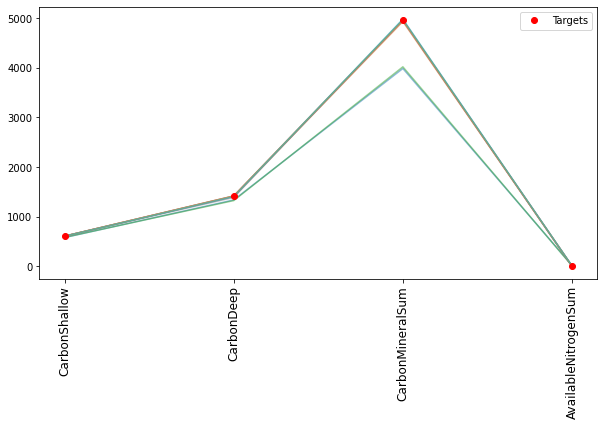

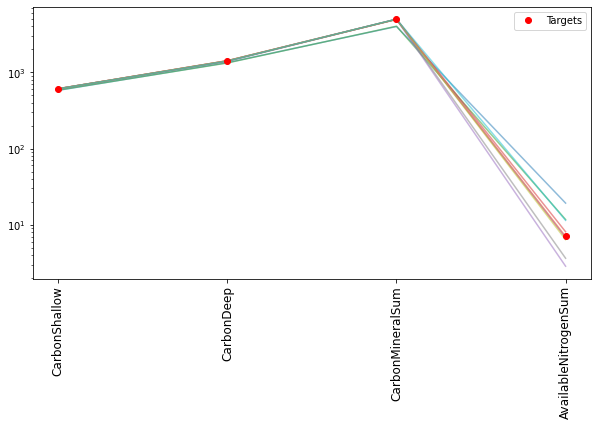

In [30]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

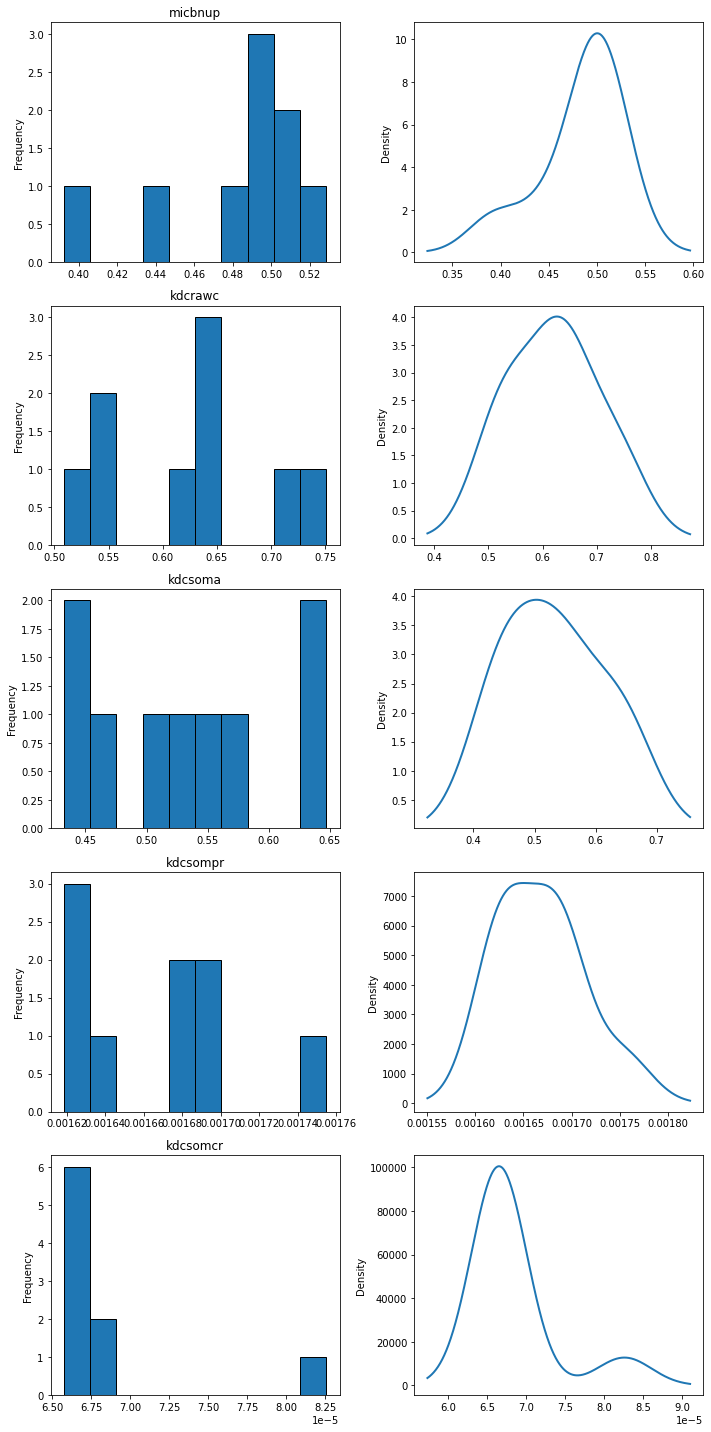

In [31]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959


In [33]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,608.499008,1418.548373,4958.589688,6.822821,0.999999,2.227857,0.015386,0.991239,0.000009,0.040262
8,608.644507,1417.199289,4957.869374,6.394271,0.999999,2.301288,0.033206,0.967371,0.000010,0.086895
6,608.353938,1415.492766,4958.814486,6.876120,0.999999,4.772612,0.013921,0.993195,0.000020,0.036430
3,608.075121,1418.457418,4960.892654,8.106103,0.999998,5.598279,0.029115,0.972842,0.000024,0.076190
4,609.604491,1405.590850,4947.272277,2.867218,0.999980,73.011569,0.382140,0.499831,0.000308,1.000000
1,609.389684,1410.939118,4932.388559,7.055476,0.999953,172.695824,0.008846,0.999594,0.000728,0.023159
9,607.256859,1406.359613,4982.346452,11.447897,0.999946,199.478153,0.097591,0.880664,0.000841,0.255381
7,609.548701,1387.974215,4975.284602,3.645329,0.999915,315.471562,0.251553,0.674168,0.001331,0.658274
2,584.040606,1325.483622,4020.799382,11.743201,0.906037,221703.853922,0.183933,0.204932,0.937897,1.054193
0,579.845907,1338.587975,3986.518932,19.266232,0.897226,237579.235365,0.245793,0.079853,1.005267,1.193428


In [34]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,RMSE
8,0.509532,0.617486,0.541531,0.001677,0.000066,0.000776
9,0.481666,0.718584,0.580089,0.001755,0.000066,0.001959
6,0.510467,0.640021,0.457620,0.001691,0.000066,0.002108
1,0.392246,0.540444,0.508834,0.001629,0.000068,0.002600
3,0.495547,0.635505,0.647033,0.001693,0.000066,0.002716
5,0.500889,0.639689,0.432204,0.001682,0.000066,0.002859
7,0.442265,0.508557,0.529330,0.001631,0.000067,0.003180
4,0.528507,0.537869,0.444790,0.001633,0.000066,0.004910
2,0.489474,0.751067,0.646229,0.001618,0.000083,0.005317
0,0.359654,0.760796,0.607767,0.001622,0.000084,0.005748


In [35]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 